<h1> Step Four : Feature Engineering and Modelling

<B>Load python packages

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as svm
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
%matplotlib inline

<B>Get Current Working Directory, read file and observe sample rows  

In [2]:
os.getcwd()

'C:\\Users\\Pranay\\Projects\\GitHub\\Capstone_II'

In [3]:
#Read CSV data
df=pd.read_csv('data/step3_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Get data types for all the colums 
df.dtypes

age                 int64
job                object
marital            object
education          object
default             int64
housing             int64
loan                int64
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

<B>Get all the columns with object datatype excluding dependent column and perform one hot encoding

In [5]:
only_obj=df.select_dtypes(include=['object'])
only_obj.drop(['y'],axis=1,inplace=True)
col=only_obj.columns

C:\Users\Pranay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
#Do One Hot encoding for the objects columns
df=pd.get_dummies(df,columns=col)

In [7]:
#Get updated data types of all the columns
df.dtypes

age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
marital_divorced

In [8]:
#Transform Dependent Variable values
df.y.replace({'yes':1,'no':0},inplace=True)

<B>Deal with other continuous variables

In [9]:
#Group Age Columns
df['Binned_Age']=pd.cut(
    df['age'],
    bins=[-np.inf,20,30,40,50,60,70,80,90,np.inf],
    labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
)

In [10]:
#Group Emp_Var_Rate columns
df['Binned_Emp_Var_Rate']=pd.cut(
    df['emp.var.rate'],
    bins=[-np.inf,-3.5,-2.5,-1.5,-0.5,0.5,1.5,np.inf],
    labels=[-4,-3,-2,-1,0,1,2]
)

In [11]:
df['euribor3m']=df['euribor3m'].round(1)
df['cons.price.idx']=df['cons.price.idx'].round(2)

<B> As our data is ready and can we used for modelling purpose, divide the data in traing data and testing data

In [12]:
X=df.drop(['Binned_Age','y','emp.var.rate'], axis=1)
y=df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

<H3><B>Fit the Data without scaling the data and check the accuracy</B></H3> 
<ul><li>Random Forest(As Random Forest does not depends on scaling of the data)
    <li>KNN
    <li>Logistic Regression 

<B>Random Forest(Unscaled Data)

In [13]:
#Fit Random Forest Algorithm on Training Data
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
#Predict the result for testing data
y_pred=rand_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Random Forest 0.895551829568991


In [14]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Random Forest\n',cm)

Confusion Matrix without scaling the data and using Random Forest
 [[8752  264]
 [ 795  328]]


In [15]:
print('Classifiaction Report without scaling the data and using Random Forest\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.55      0.29      0.38      1123

    accuracy                           0.90     10139
   macro avg       0.74      0.63      0.66     10139
weighted avg       0.88      0.90      0.88     10139



<B> KNN(Unscaled Data)

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using KNN 0.8937765065588322


In [17]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using KNN\n',cm)

Confusion Matrix without scaling the data and using KNN
 [[8753  263]
 [ 814  309]]


In [18]:
print('Classifiaction Report without scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9016
           1       0.54      0.28      0.36      1123

    accuracy                           0.89     10139
   macro avg       0.73      0.62      0.65     10139
weighted avg       0.87      0.89      0.88     10139



<B>Logistic Regression(Unscaled Data)

In [19]:
lr_clf = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression 0.9038366702830654


In [20]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression
 [[8898  118]
 [ 857  266]]


In [21]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.69      0.24      0.35      1123

    accuracy                           0.90     10139
   macro avg       0.80      0.61      0.65     10139
weighted avg       0.89      0.90      0.88     10139



<B>Get the Roc curve for the results

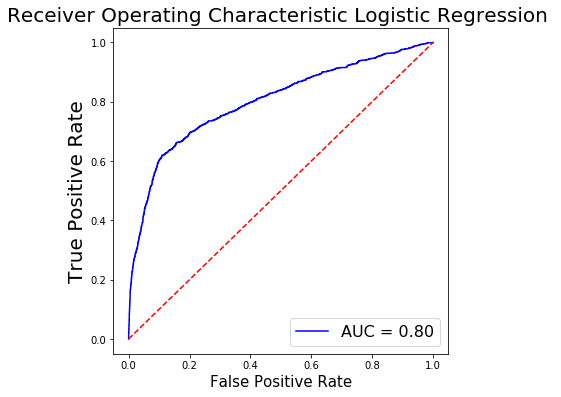

In [22]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [23]:
#Get the AUC score
from sklearn.metrics import roc_auc_score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.80114213694305


In [24]:
#Adjust the threshold to 0.20
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
# Print the accuracy from the testing data.
print('Accuracy Score without scaling the data and using Logistic Regression with updated threshold',accuracy_score(y_pred, y_test))

Accuracy Score without scaling the data and using Logistic Regression with updated threshold 0.8774040832429234


In [25]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression with updated threshold\n',cm)

Confusion Matrix without scaling the data and using Logistic Regression with updated threshold
 [[8282  734]
 [ 509  614]]


In [26]:
print('Classifiaction Report without scaling the data and using Logistic Regression with updated threshold\n',classification_report(y_test, y_pred))

Classifiaction Report without scaling the data and using Logistic Regression with updated threshold
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9016
           1       0.46      0.55      0.50      1123

    accuracy                           0.88     10139
   macro avg       0.70      0.73      0.71     10139
weighted avg       0.89      0.88      0.88     10139



<B>For this project it is important to have good recall and F1 score. Therefore there is need to improve recall score</B>

from sklearn.cluster import KMeans
x = df.drop(['Binned_Age','Binned_Emp_Var_Rate','y'], axis=1).values
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

from sklearn.metrics import silhouette_score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_

    score = silhouette_score(x, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

<H3>Scale the Data and then split again</H3>

In [27]:
X = df.drop(['Binned_Age','y'], axis=1)
y=df.y
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

<B>Here going forward, X_train and X_test will be our scaled data. For Scaled data, we will be using below algorithms</B>
<ul><li>Random Forest
    <li>KNN
    <li>Logistic Regression 
    <li>SVM   

<B>Random Forest Scaled Data

In [31]:
rand_clf1 = RandomForestClassifier()
rand_clf1.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf1.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest: f1-score=%.3f' % (f1))

Accuracy Score of Random Forest is 0.8968340072985501
Random Forest: f1-score=0.882


In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8765  251]
 [ 795  328]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.57      0.29      0.39      1123

    accuracy                           0.90     10139
   macro avg       0.74      0.63      0.66     10139
weighted avg       0.88      0.90      0.88     10139



30


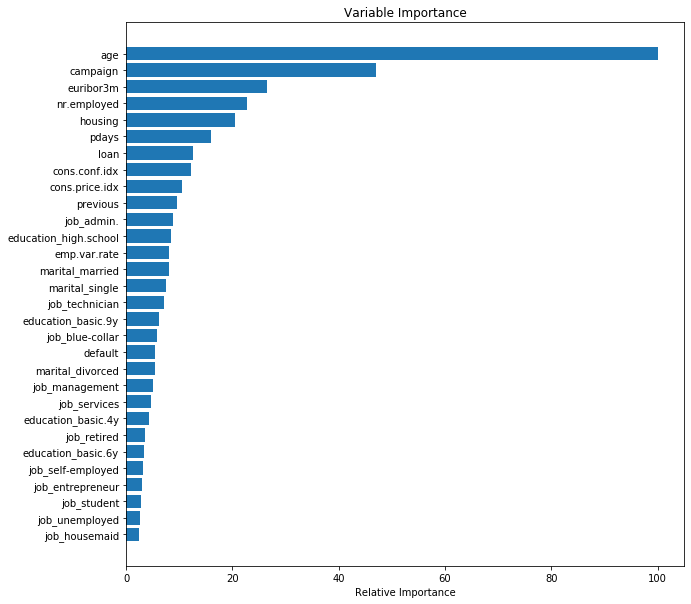

In [43]:
feature_importance = rand_clf1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

<B>KNN(Scaled Data)

In [38]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
#fit the data
y_pred=knn1.predict(X_test)
print('Accuracy Score scaling the data and using KNN',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred, average='weighted')
print('KNN: f1-score=%.3f' % (f1))

Accuracy Score scaling the data and using KNN 0.8895354571456752
KNN: f1-score=0.878


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8667  349]
 [ 771  352]]


In [40]:
print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using KNN
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      9016
           1       0.50      0.31      0.39      1123

    accuracy                           0.89     10139
   macro avg       0.71      0.64      0.66     10139
weighted avg       0.87      0.89      0.88     10139



<B>Logistic Regression with Scaled Data

In [47]:
lr_clf1 = LogisticRegression(max_iter=1000)
# Fit the model on the trainng data.
lr_clf1.fit(X_train, y_train)
y_pred=lr_clf1.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.9034421540585856


In [48]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix with scaling the data and using Logistic Regression\n',cm)

Confusion Matrix with scaling the data and using Logistic Regression
 [[8901  115]
 [ 864  259]]


In [49]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.69      0.23      0.35      1123

    accuracy                           0.90     10139
   macro avg       0.80      0.61      0.65     10139
weighted avg       0.89      0.90      0.88     10139



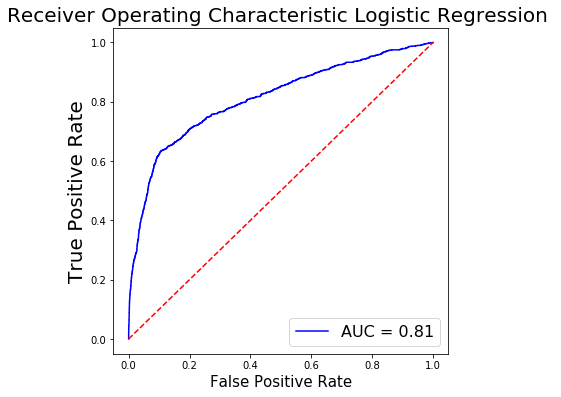

In [50]:
from sklearn import metrics
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf1.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [51]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.8115315031119111


In [60]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after scaling the data and using logistic regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred, average='weighted')
print('Logistic Regression: f1-score=%.3f' % (f1))

Accuracy Score by after scaling the data and using logistic regression 0.8747410987276851
Logistic Regression: f1-score=0.883


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8185  831]
 [ 439  684]]


In [62]:
print('Classification Report after scaling the data and using Logistic regression\n',classification_report(y_test, y_pred))

Classification Report after scaling the data and using Logistic regression
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      9016
           1       0.45      0.61      0.52      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.76      0.72     10139
weighted avg       0.89      0.87      0.88     10139



<B>SVM(Scaled Data)

In [69]:
clf_svm = svm()
clf_svm.fit(X_train, y_train)
y_pred=clf_svm.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.899990137094388


In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8896  120]
 [ 894  229]]


In [71]:
print('Classifiaction Report with scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

Classifiaction Report with scaling the data and using Logistic Regression
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.66      0.20      0.31      1123

    accuracy                           0.90     10139
   macro avg       0.78      0.60      0.63     10139
weighted avg       0.88      0.90      0.88     10139



<H3>Still Recall score for "yes" is not improved as expected, Need to check more on improving recall score by trying regularization method</H3> 
<UL><LI>Ridge Regression

<B>Ridge_Regression

In [73]:
ridge=RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print('Accuracy Score of Ridge Regression is',accuracy_score(y_pred, y_test))

Accuracy Score of Ridge Regression is 0.9036394121708256


In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8914  102]
 [ 875  248]]


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9016
           1       0.71      0.22      0.34      1123

    accuracy                           0.90     10139
   macro avg       0.81      0.60      0.64     10139
weighted avg       0.89      0.90      0.88     10139



<H3>Still there is need to improve Recall Score and F1 Score for the models. There is need to balance data<H3>    

<B>For Balancing data we will use class weight method. Once done we will use below algorithms
    <ul><li>Random Forest
    <li>Logistic Regression 
    <li>SVM  

In [112]:
classes=[1,0]
weights = compute_class_weight('balanced', classes, y=y_train)
weights

C:\Users\Pranay\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


array([4.4272198 , 0.56365827])

<B>Random Forest(updated class weight)

In [113]:
rand_clf2= RandomForestClassifier(class_weight={0:0.56365827,1:4.4272198})
rand_clf2.fit(X_train, y_train)
# Print the accuracy from the testing data.
y_pred=rand_clf2.predict(X_test)
print('Accuracy Score of Random Forest is',accuracy_score(y_pred, y_test))

Accuracy Score of Random Forest is 0.8936778775027123


In [114]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8741  275]
 [ 803  320]]


In [115]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9016
           1       0.54      0.28      0.37      1123

    accuracy                           0.89     10139
   macro avg       0.73      0.63      0.66     10139
weighted avg       0.87      0.89      0.88     10139



<B>Plot ROC Curve for Random Forest

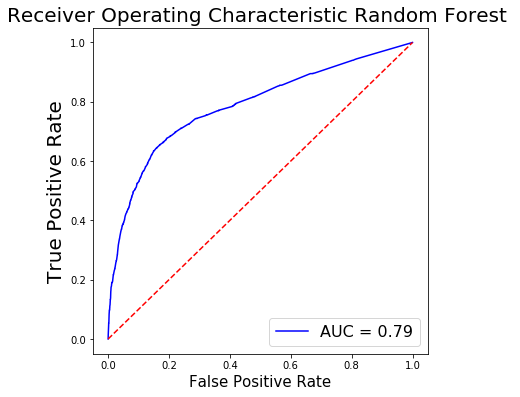

In [116]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rand_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [117]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.7864356707102679


In [124]:
#update the threshold and then predict the value
THRESHOLD = 0.30
#y_pred=clf.predict(X_test)
y_pred=np.where(rand_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after scaling the data and using Random Forest 0.875036985896045


In [125]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8347  669]
 [ 598  525]]


In [126]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      9016
           1       0.44      0.47      0.45      1123

    accuracy                           0.88     10139
   macro avg       0.69      0.70      0.69     10139
weighted avg       0.88      0.88      0.88     10139



<B>Logistic Regression (updated class weight) </B>

In [127]:
lr_clf2 = LogisticRegression(class_weight={0:0.56365827,1:4.4272198},max_iter=1000)
# Fit the model on the trainng data.
lr_clf2.fit(X_train, y_train)
y_pred=lr_clf2.predict(X_test)
# Print the accuracy from the testing data.
print('Accuracy Score with scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))

Accuracy Score with scaling the data and using Logistic Regression 0.8301607653614755


In [128]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7677 1339]
 [ 383  740]]


In [129]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      9016
           1       0.36      0.66      0.46      1123

    accuracy                           0.83     10139
   macro avg       0.65      0.76      0.68     10139
weighted avg       0.89      0.83      0.85     10139



<B>Plot Ruc Curve for Logistic Regression

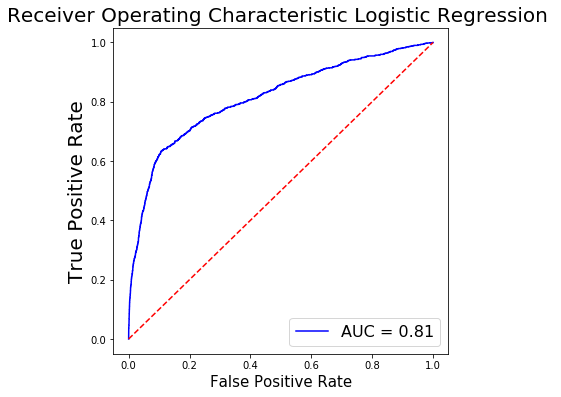

In [130]:
fig, ax = plt.subplots(figsize = (6,6))
probs = lr_clf2.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Logistic Regression ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

In [131]:
#Get the AUC score
print("AUC: {}".format(roc_auc_score(y_test, preds)))

AUC: 0.8127621242852323


In [139]:
#update the threshold and then predict the value
THRESHOLD = 0.65
#y_pred=clf.predict(X_test)
y_pred=np.where(lr_clf2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print('Accuracy Score by after balancing the data and using Random Forest',accuracy_score(y_pred, y_test))

Accuracy Score by after balancing the data and using Random Forest 0.8713877108196074


In [140]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8147  869]
 [ 435  688]]


In [141]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      9016
           1       0.44      0.61      0.51      1123

    accuracy                           0.87     10139
   macro avg       0.70      0.76      0.72     10139
weighted avg       0.89      0.87      0.88     10139



In [142]:
clf_svm1 = svm(class_weight={0:0.56365827,1:4.4272198})
clf_svm1.fit(X_train, y_train)
y_pred=clf_svm1.predict(X_test)
print('Accuracy Score of SVM is',accuracy_score(y_pred, y_test))

Accuracy Score of SVM is 0.8419962520958675


In [143]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix after updating class weight and using Logistic Regression\n',cm)

Confusion Matrix after updating class weight and using Logistic Regression
 [[7824 1192]
 [ 410  713]]


In [144]:
print('Classifiaction Report after balancing the data and using Random Forest\n',
      classification_report(y_test, y_pred))

Classifiaction Report after balancing the data and using Random Forest
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      9016
           1       0.37      0.63      0.47      1123

    accuracy                           0.84     10139
   macro avg       0.66      0.75      0.69     10139
weighted avg       0.89      0.84      0.86     10139



In [ ]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(max_iter=1000)
clf_cv=GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

In [ ]:
clf_best=LogisticRegression(C=10,max_iter=1000)
clf_best.fit(X_train, y_train)

In [ ]:
THRESHOLD = 0.20
#y_pred=clf.predict(X_test)
y_pred=np.where(clf_best.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix without scaling the data and using Logistic Regression\n',cm)

In [ ]:
print('Accuracy Score without scaling the data and using Logistic Regression',accuracy_score(y_pred, y_test))
f1 = f1_score(y_test, y_pred, average='weighted')
print('Logistic Regression without scaling: f1-score=%.3f' % (f1))

In [ ]:
print('Classifiaction Report without scaling the data and using Logistic Regression\n',classification_report(y_test, y_pred))

<B>KNN

In [ ]:
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(X_train,y_train)
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn_cv.fit(X_train,y_train)

In [ ]:
#print("Tuned KNN Parameters: {}".format(knn_cv.best_params_))
#print("Best score is {}".format(knn_cv.best_score_))

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=30)
#knn.fit(X_train, y_train)

In [ ]:
#y_pred=knn.predict(X_test)
#print('Accuracy Score without scaling the data and using KNN',accuracy_score(y_pred, y_test))
#f1 = f1_score(y_test, y_pred, average='weighted')
#print('KNN: f1-score=%.3f' % (f1))

In [ ]:
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

In [ ]:
#print('Classification Report after scaling the data and using KNN\n',classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
clf_cv=GridSearchCV(clf,random_grid,cv=5)

In [ ]:
clf_cv.fit(X_train,y_train)